In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

In [2]:
# Function to fill missing values using ARIMA
def fill_missing_arima(data):
    missing_indices = np.where(data.isna())[0]
    
    # # Fit ARIMA model upto the non-missing data values
    # model = ARIMA(np.array(data.iloc[:missing_indices[0]]), order=(2, 1, 0)) 
    # model_fit = model.fit()
    
    # Predict missing values
    for i in missing_indices:
        # Update the model with the latest available data
        # model = ARIMA(np.array(data[:i].dropna()), order=(2, 1, 0))
        model = ARIMA(np.array(data.iloc[:i]), order=(2, 1, 0))
        model_fit = model.fit()
        
        # Forecast the next value
        forecast = model_fit.forecast(steps=1)
        data[i] = forecast[0]
    
    return data

In [30]:
del dataset
dataset = pd.read_csv("apple_2023_masked.csv")

In [39]:
dataset["5day"][::-1].copy().reset_index().drop(columns=["index"])

,5day
0,192.024185
1,193.071426
2,192.642548
3,192.542816
4,193.091385
...,...
245,129.086517
246,128.560867
247,123.998451
248,125.327515


In [44]:
list(fill_missing_arima(dataset["5day"][::-1].copy().reset_index().drop(columns=["index"])["5day"])[::-1])

[124.04804229736328,
 125.3275146484375,
 123.99845123291016,
 128.5608673095703,
 129.08651733398438,
 129.66180419921875,
 132.39926147460938,
 132.31991577148438,
 133.6588897705078,
 134.8292236328125,
 134.10519409179688,
 134.16470336914062,
 136.7434539794922,
 139.9569854736328,
 141.36538696289062,
 140.7008514404297,
 142.78372192382812,
 144.7375946044922,
 141.83154296875,
 143.11097717285156,
 144.24168395996094,
 149.587646484375,
 153.237548828125,
 150.49021911621094,
 153.38633728027344,
 150.67864990234375,
 149.63722229003906,
 150.0047607421875,
 152.8258819580078,
 147.7448111335029,
 147.74559008864853,
 147.74536555858572,
 147.73218938416724,
 147.7186274986035,
 147.91876220703125,
 148.4054718017578,
 145.7333984375,
 146.93533325195312,
 146.42874145507812,
 144.34271240234375,
 144.938720703125,
 150.02464294433594,
 152.80599975585938,
 150.5908660888672,
 151.85240173339844,
 149.5875701904297,
 147.511474609375,
 149.4683837890625,
 151.57424926757812,
 1

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517


In [5]:
apple_data = dataset.copy()

In [66]:
daynumber = "1day"
# Apply the function to impute missing values
apple_data[daynumber+"_imputed"] = fill_missing_arima(apple_data[daynumber].copy())
apple_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,...,4day_imputed,4day_imputed_reversed,4dayfbarima_average,3day_imputed,3day_imputed_reversed,3dayfbarima_average,2day_imputed,2day_imputed_reversed,2dayfbarima_average,1day_imputed
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,...,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,...,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,...,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,...,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,...,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,...,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,...,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,...,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,...,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426


In [67]:
daynumber = "1day"
# Apply the function to impute missing values
# apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(apple_data[daynumber][::-1].copy())[::-1]

apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(dataset[daynumber][::-1].copy().reset_index().drop(columns=["index"])[daynumber])
apple_data[daynumber+"_imputed_reversed"] = apple_data[daynumber+"_imputed_reversed"][::-1].reset_index().drop(columns=["index"])
apple_data[daynumber+"fbarima_average"] = (apple_data[daynumber+"_imputed_reversed"] + apple_data[daynumber+"_imputed"])/2
apple_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,...,4dayfbarima_average,3day_imputed,3day_imputed_reversed,3dayfbarima_average,2day_imputed,2day_imputed_reversed,2dayfbarima_average,1day_imputed,1day_imputed_reversed,1dayfbarima_average
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,...,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,...,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,...,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,...,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,...,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,...,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,...,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,...,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,...,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426


<Axes: >

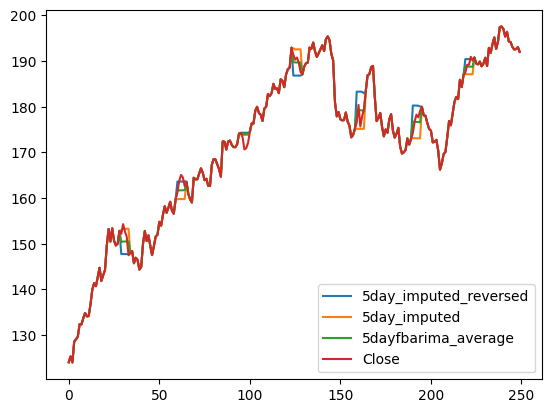

In [59]:
apple_data[["5day_imputed_reversed", "5day_imputed", "5dayfbarima_average", "Close"]].plot()

<Axes: >

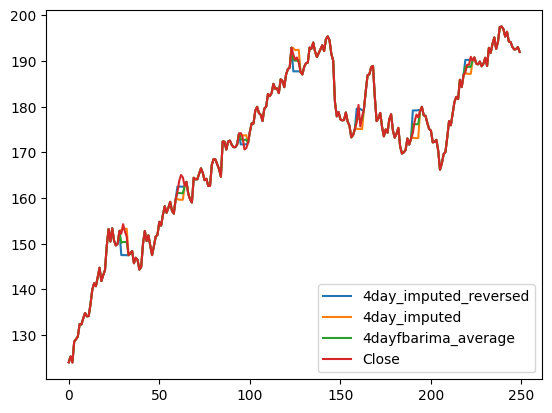

In [69]:
apple_data[["4day_imputed_reversed", "4day_imputed", "4dayfbarima_average", "Close"]].plot()

In [70]:
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,...,4dayfbarima_average,3day_imputed,3day_imputed_reversed,3dayfbarima_average,2day_imputed,2day_imputed_reversed,2dayfbarima_average,1day_imputed,1day_imputed_reversed,1dayfbarima_average
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,...,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,...,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,...,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,...,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,...,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517


In [78]:
apple_data['Close_interpolated'] = apple_data['Missing'].interpolate(method='linear')

In [81]:
daynumber = '5day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print(mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

3.4755440464642504
4.007862916544621


In [82]:
daynumber = '4day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print(mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

3.398599024755626
3.716943390325388


Fit model in the reverse

In [83]:
daynumber = '3day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print(mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

1.8751985815220782
2.4955888146036136


In [84]:
daynumber = '2day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print(mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

2.5263174677171785
3.2205527117102535


In [85]:
daynumber = '1day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print(mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

0.679228361280242
0.9152634246800739


In [ ]:
lip_values = [0.679228361280242, 2.5263174677171785, 1.8751985815220782, 3.398599024755626, 3.4755440464642504]
fbarima_average_values = [0.9152634246800739, 3.2205527117102535, 2.4955888146036136, 3.716943390325388, 4.007862916544621]